['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', 'boxplot', 'heatmap', 'histogram', 'label', 'scatter']


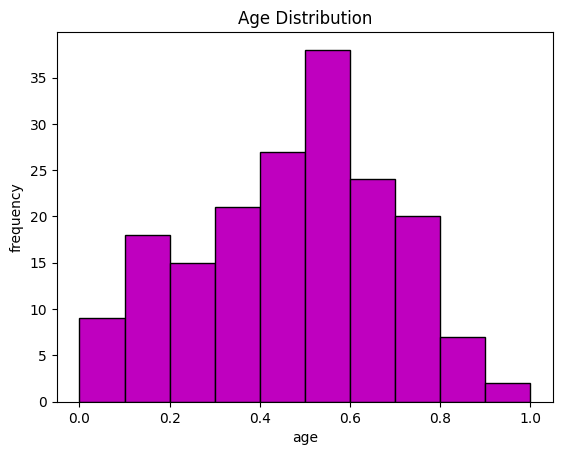

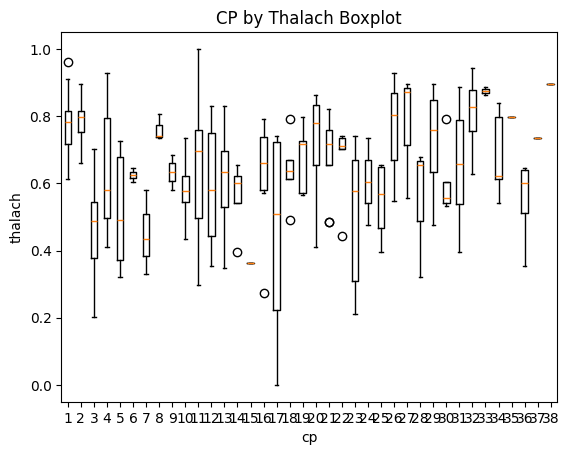

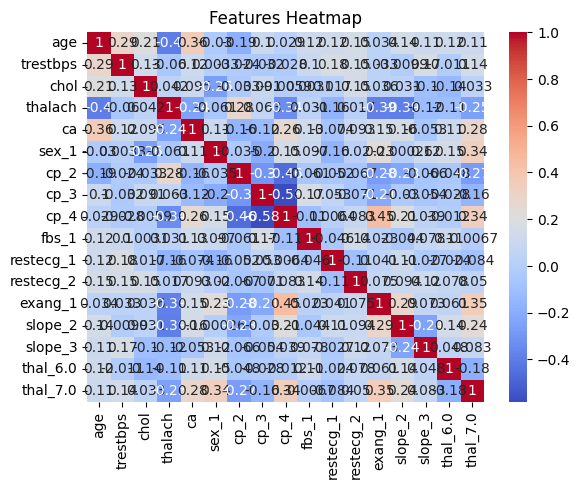

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))
import importlib
import pandas as pd
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from src.utils import Preprocessor, Plotter

# Fetch dataset
heart_disease = fetch_ucirepo(id =45)
patient_info = heart_disease.data.features
diagnosis_results = heart_disease.data.targets 

X_train, X_test, y_train, y_test = train_test_split(patient_info, diagnosis_results, test_size=0.4,  stratify=diagnosis_results, random_state=42)

prep = Preprocessor()
X_train = prep.fillna(X_train)
X_test = prep.fillna(X_test)
X_train_processed = prep.fit_transform(X_train)
X_test_processed = prep.transform(X_test)

#Transform to 1d-array
y_train = y_train.squeeze()
y_test = y_test.squeeze()
#Transform to binary
y_train = (y_train > 0).astype(int)
y_test = (y_test > 0).astype(int)

print(dir(Plotter))

eda = Plotter(X_train_processed)
eda.histogram('age')
eda.label("age", "frequency", "Age Distribution")
eda.boxplot('age', 'thalach')
eda.label("cp", "thalach", "CP by Thalach Boxplot")
eda.heatmap()
eda.label(None, None, "Features Heatmap")

# Save processed data
X_train_processed.to_csv("../data/X_train_processed.csv", index=False)
X_test_processed.to_csv("../data/X_test_processed.csv", index=False)
y_train.to_csv("../data/y_train.csv", index=False)
y_test.to_csv("../data/y_test.csv", index=False)

